<a href="https://colab.research.google.com/github/xhang24/xiaotong/blob/master/src/hw10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
D = np.random.normal(1,2,10000)
D1 = np.random.normal(1,2,10000000)

In [0]:
def SA(dataset, α):
  n=len(dataset)
  b=0.
  for i in range(n):
    b=b+α*(dataset[i]-b)
  return b

print('The estimated b generated by SA with n=10000 is',SA(D,0.01))
print('The estimated b generated by SA with n=10000000 is',SA(D1,0.01))

The estimated b generated by SA with n=10000 is 0.9679374615964168
The estimated b generated by SA with n=10000000 is 1.0203400187342835


In [0]:
def Update_SA(dataset):
  n=len(dataset)
  b=0.
  for i in range(n):
    α=1/(i+1)
    b=b+α*(dataset[i]-b)
  return b
print('The estimated b generated by Update_SA with n=10000 is',Update_SA(D))
print('The estimated b generated by Update_SA with n=10000000 is',Update_SA(D1))

The estimated b generated by Update_SA with n=10000 is 0.9774702210328653
The estimated b generated by Update_SA with n=10000000 is 0.9996623698410543


In [0]:
SA_list=[]
Up_SA=[]
x=[]
for i in range(8):
  j=i+1
  n=10**j
  D = np.random.normal(1,2,n)
  mu_sa=SA(D,0.01)
  SA_list.append(mu_sa)
  mu_usa=Update_SA(D)
  Up_SA.append(mu_usa)
  x.append(n)

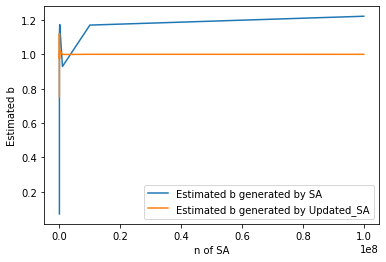

In [0]:
plt.plot(x,SA_list,label='Estimated b generated by SA')
plt.plot(x,Up_SA,label='Estimated b generated by Updated_SA')
plt.xlabel('n of SA')
plt.ylabel('Estimated b')
plt.legend()

In [0]:
def init_value(N):
  h=1/N
  v=np.zeros([N+1,N+1])
  for i in range(N+1):
    for j in range(N+1):
      if i==0 or i==N or j==0 or j==N:
        v[i,j]=((h**2)/(2+h**2))*((i/N-0.5)**2+(j/N-0.5)**2-2)
  return v

def F(u,N):
  h=1/N
  v=np.zeros([N+1,N+1])
  for i in range(N+1):
    for j in range(N+1):
      if i==0 or i==N or j==0 or j==N:
        v[i,j]=u[i,j]
      else:
        v[i,j]=(2/(2+h**2))*((h**2/2)*((i*h)**2+(j*h)**2-(i*h)-(j*h)-(3/2))+(1/4)*(u[i+1,j]+u[i,j+1]+u[i,j-1]+u[i-1,j]))
  return v

def VI(N, tolerance):
  v=init_value(N)
  error=1
  step=0
  while error>tolerance:
    step+=1
    u=v
    v=F(u,N)
    error=np.max(np.abs(u - v))
  return [error, step, v]

In [0]:
soln=VI(8,0.0001)
print('>>>>>>For h=1/8, the CFD solution by value iteration is \n ' , soln[2])

>>>>>>For h=1/8, the CFD solution by value iteration is 
  [[-0.01162791 -0.01247578 -0.0130814  -0.01344477 -0.01356589 -0.01344477
  -0.0130814  -0.01247578 -0.01162791]
 [-0.01247578 -0.07290541 -0.10764452 -0.12598826 -0.13174825 -0.12598826
  -0.10764452 -0.07290541 -0.01247578]
 [-0.0130814  -0.10764452 -0.16591048 -0.19755997 -0.20759792 -0.19755997
  -0.16591048 -0.10764452 -0.0130814 ]
 [-0.01344477 -0.12598826 -0.19755997 -0.23708997 -0.24971308 -0.23708997
  -0.19755997 -0.12598826 -0.01344477]
 [-0.01356589 -0.13174825 -0.20759792 -0.24971308 -0.26319384 -0.24971308
  -0.20759792 -0.13174825 -0.01356589]
 [-0.01344477 -0.12598826 -0.19755997 -0.23708997 -0.24971308 -0.23708997
  -0.19755997 -0.12598826 -0.01344477]
 [-0.0130814  -0.10764452 -0.16591048 -0.19755997 -0.20759792 -0.19755997
  -0.16591048 -0.10764452 -0.0130814 ]
 [-0.01247578 -0.07290541 -0.10764452 -0.12598826 -0.13174825 -0.12598826
  -0.10764452 -0.07290541 -0.01247578]
 [-0.01162791 -0.01247578 -0.0130814 

2.3 when  h = 1/8, the CFD solution through Monte-Carlo method.

In [0]:
h=1/8
gamma=2/(2+h**2)
gamma

0.9922480620155039

In [0]:
class grid:
    def __init__(self, shape = (9, 9)):
        self.n_dim = len(shape)
        self.shape = shape

    def is_interior(self,ix):
        return all([0.<a<b-1 for a,b in zip(ix,list(self.shape))])

    def step(self, ix):
        run_cost = 0.                
        ix_next = []; pr_next= []
        if self.is_interior(ix):
            run_cost = 1.
            for i in range(self.n_dim):
                ix1 = ix.copy(); ix1[i]+=1; ix_next += [ix1,]
                pr1 = 1./(self.n_dim*2.0) 
                pr_next += [pr1,]
            for i in range(self.n_dim):
                ix1 = ix.copy(); ix1[i]-=1; ix_next += [ix1,]
                pr1 = 1./(self.n_dim*2.0) 
                pr_next += [pr1,]
     
        return run_cost, ix_next, pr_next
    
    def step_random(self, ix):
        run_cost, ix_next, pr_next = self.step(ix)
        ix_next_rd = random.choices(ix_next, pr_next, k = 1)
        return ix_next_rd[0]

def init_value(N):
  h=1/N
  v=np.zeros([N+1,N+1])
  for i in range(N+1):
    for j in range(N+1):
      if i==0 or i==N or j==0 or j==N:
        v[i,j]=((h**2)/(2+h**2))*((i/N-0.5)**2+(j/N-0.5)**2-2)
  return v

def inner_point(N):
  matrix=[]
  y=np.zeros(N-1)
  for j in range(N-1):
    y[j]=j+1
  for i in range(N-1):
    x=np.zeros(N-1)
    for m in range(N-1):
      x[m]=i+1
    point=list(zip(x,y))
    matrix=matrix+point
  return matrix

def path_list(N,n):
  path_list=[]
  inpoint=inner_point(N)
  for i in range((N-1)*(N-1)):
    for j in range(n):
      g1 = grid(shape=(9,9))
      ix = list(inpoint[i])
      ix_list=[]
      while g1.is_interior(ix):
          ix = g1.step_random(ix)
          ix_list.append(ix)
      path_list.append(ix_list)
  return path_list

def R(ix,N):
  h=1/N
  a=((h**2)/(2+h**2))*((ix[0]/N-0.5)**2+(ix[1]/N-0.5)**2-2)
  return a

def mean_G(path,checkpoint,N):
  h=1/N
  gamma=2/(2+h**2)
  index=[i for i in range(len(path)) if path[i] == checkpoint]
  value=0
  if len(index)!=0:
    for m in range(len(index)):
      c=index[m]
      list1=path[c:]
      g=0
      for j in range(len(list1)):
        g+=(gamma**j)*R(list1[j],N)
      value+=g
  return value


  
  
def mc_vx(n,N):
  h=1/N
  gamma=2/(2+h**2)
  vx_matrix=init_value(N)
  path=path_list(N,n)
  inpoint=inner_point(N)
  for i in range((N-1)*(N-1)):
    g=0
    checkpoint1=list(inpoint[i])
    for j in range(len(path)):
      g+=mean_G(path[j],checkpoint1,N)
    g=g/len(path)
    x_axis=int(checkpoint1[0])
    y_axis=int(checkpoint1[1])
    vx_matrix[x_axis,y_axis]=g
  return vx_matrix
